<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/T17_NLP_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Gustavo Rocha">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

## <h1 align=left><font size = 6, style="color:rgb(200,0,0)">Fundamentos de NLP</font></h1>
<hr>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gráficos com palavras

Neste primeiro exercício/exemplo vamos aprender a fazer gráficos com palavras retomando um exemplo da primeira aula.



Continuaremos a trabalhar nesse primeiro exemplo com os textos do Shakeaspeare.

In [10]:
!wget 'https://www.gutenberg.org/files/1112/1112.txt' -O RomeoandJuliet.txt

--2021-11-16 18:52:23--  https://www.gutenberg.org/files/1112/1112.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179410 (175K) [text/plain]
Saving to: ‘RomeoandJuliet.txt’

RomeoandJuliet.txt  100%[===================>] 175.21K  --.-KB/s    in 0.03s   

2021-11-16 18:52:31 (5.34 MB/s) - ‘RomeoandJuliet.txt’ saved [179410/179410]



In [11]:
!pip install wordcloud

In [12]:
from pathlib import Path
text = Path('RomeoandJuliet.txt').read_text()

In [13]:
from wordcloud import WordCloud   

In [14]:
wordcloud = WordCloud(width=2000, height=1000, 
    colormap='prism', background_color='white')

In [15]:
wordcloud = wordcloud.generate(text)

In [16]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

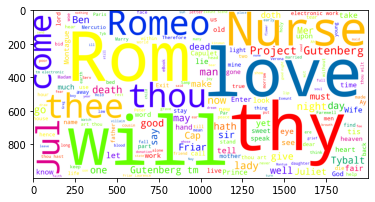

In [17]:
plt.imshow(wordcloud)

## Repita o exercício acima para o texto do Hamlet

# Frequência com Gráficos de Barras

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
%matplotlib inline
from pathlib import Path
blob = TextBlob(Path('RomeoandJuliet.txt').read_text())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [20]:
items = blob.word_counts.items()

In [21]:
items = [item for item in items if item[0] not in stop_words]

In [22]:
from operator import itemgetter

In [23]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [24]:
top20 = sorted_items[0:21]

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(top20, columns=['word', 'count'])  

In [27]:
df

,word,count
0,thou,278
1,thy,164
2,rom,163
3,romeo,162
4,nurse,150
5,love,148
6,thee,138
7,jul,117
8,shall,112
9,come,99


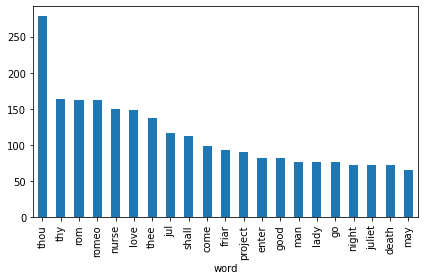

In [28]:
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

Repita o Exercício acima para o texto do Hamlet

# Análise de Sentimento

Use a biblioteca textblob para fazer análise de sentimento nas seguintes sentenças#

1 - A grama da vizinho é sempre mais verde. -> The grass is always greener on the other side of the fence.
2 - Cada um por si e Deus por todos. -> Every man for himself (and the devil take the hindmost).
3 - Diga com quem andas e te direi quem és. ->	Birds of a feather flock together.


In [29]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
text = 'The grass is always greener on the other side of the fence. Every man for himself (and the devil take the hindmost). Birds of a feather flock together. '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
#crie o blob
blob = TextBlob(text)

In [31]:
#mostre cada uma das sentenças
blob.sentences

[Sentence("The grass is always greener on the other side of the fence."),
 Sentence("Every man for himself (and the devil take the hindmost)."),
 Sentence("Birds of a feather flock together.")]

In [32]:
#calcule o score de sentimento (polarity e subjectivity) para cada sentença
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


# Lematização com a spaCy

No exercício abaixo, use as sentenças do exercício anterior para lematizar. 

In [33]:
import spacy
nlp = spacy.load("en_core_web_sm") 
doc = nlp("") # substitua seu texto aqui

In [34]:
for token in doc:
  print(token.text,token.lemma_)

# POS Tagging com spaCy

Utilize as mesmas sentenças do exercício anterior para fazer POS Tagging. Interprete o significado e verifique se estão de acordo com o esperado. 

In [35]:
doc = nlp("") #seu texto vai aqui

for token in doc:
    print(token.text, token.lemma_,token.tag_)

# Vetorizando com o TF_IDF

Fique tranquilo. Neste exercício vamos apenas mostrar como fazer TF-IDF no Python. Se preocupe em acompanhar a sequencia de raciocínio aqui. Mais uma vez iremos utilizar as 3 sentenças anteriores: 


In [36]:
import pandas as pd 
df =pd.read_csv('cuisine_data.csv')

FileNotFoundError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Document1= "The grass is always greener on the other side of the fence."
Document2= " Every man for himself (and the devil take the hindmost)."
Document3= "Birds of a feather flock together."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(Doc)

In [ ]:
analyze = vectorizer.build_analyzer()

print('Document 1',analyze(Document1))

print('Document 2',analyze(Document2))

print('Document 3',analyze(Document3))

print('Document transform',X.toarray())

In [ ]:
print(vectorizer.get_feature_names_out())

In [ ]:
len((vectorizer.get_feature_names_out()))

In [ ]:
import pandas as pd 
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
df

# Repita o Processo agora para um novo conjunto de sentenças 

In [ ]:
import pandas as pd 
df = pd.read_csv('cuisine_data.csv')

In [ ]:
df.head()

In [ ]:
df.cuisine.value_counts()

In [ ]:
ingredientes = df.cuisine_description.to_list()

In [ ]:
X = vectorizer.fit_transform(ingredientes)

In [ ]:
print('Document transform',X.toarray())

In [ ]:
print(vectorizer.get_feature_names_out())

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
df

# Desafio: Ganhe 0,5 ponto na N2

Crie seu próprio algoritmo TF-IDF se apoiando no notebook da primeira aula do curso. Olhe o exercício 7 e 8 do primeiro notebook deste curso. 